In [1]:
import os
os.getcwd()

'c:\\Users\\ebaca\\Desktop\\Interacting Galaxies Project'

clean code >>

In [2]:
from funcrefs import PhotAnnulus as phan
from funcrefs import custom_colormap as ccm

from astropy.io import fits
import numpy as np

from astropy.stats import SigmaClip
import photutils.background as pb

In [3]:
ngc4567 = {
    'g': fits.open('NGC 4567/calibrated_g.fits')[0].data,
    'ha': fits.open('NGC 4567/calibrated_ha.fits')[0].data,
    'r': fits.open('NGC 4567/calibrated_r.fits')[0].data,
    'i': fits.open('NGC 4567/calibrated_i.fits')[0].data
}

ngc_sfr = ngc4567['r'] - ngc4567['ha']
ngc_bkg = pb.Background2D(ngc_sfr, box_size=(100, 100), filter_size=(3, 3), sigma_clip=SigmaClip(sigma=3),
                    mask=(ngc_sfr == 0), bkg_estimator=pb.MedianBackground())

ngc_sfr = ngc_sfr - ngc_bkg.background

In [4]:
m58 = {
    'g': fits.open('M 58/calibrated_g.fits')[0].data,
    'ha': fits.open('M 58/calibrated_ha.fits')[0].data,
    'r': fits.open('M 58/calibrated_r.fits')[0].data
}

m_sfr = m58['r'] - m58['ha']
m_bkg = pb.Background2D(m_sfr, box_size=(100, 100), filter_size=(3, 3), sigma_clip=SigmaClip(sigma=3),
                    mask=(m_sfr == 0), bkg_estimator=pb.MedianBackground())

m_sfr = m_sfr - m_bkg.background

Snippet Resolution:  335 x 335 px


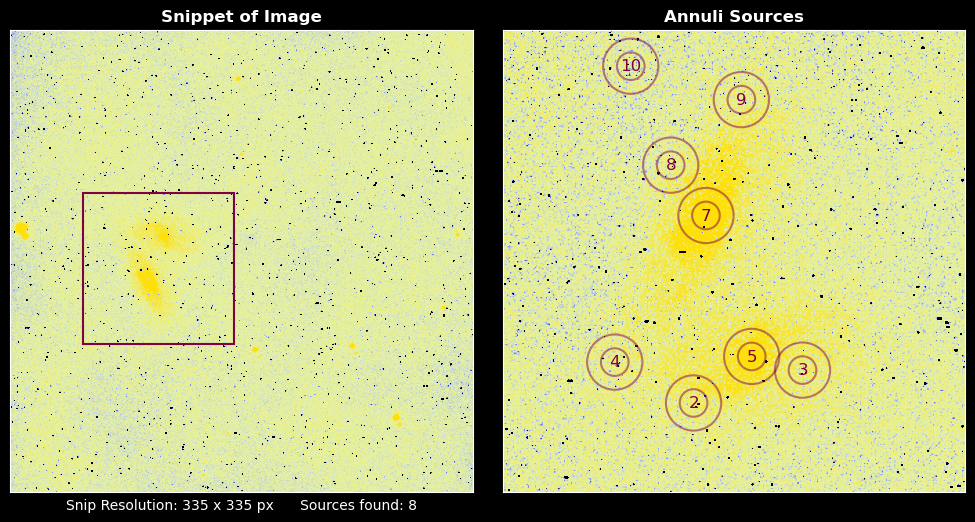

In [9]:
# initialize the PhotAnnulus class for NGC 4567
ngc = phan(ngc_sfr)
ngc_norm = ngc.normalizer() # defaults: interval='ZScale', stretch='Sqrt', pmin=1, pmax=99.75
ngc_snippet, ngc_sources = ngc.sources(xdim=(160, 495), ydim=(360, 695), sigma=3) # defaults: fwhm=4, threshold=5, r_in=10, r_out=20

# getting rid of bad sources
ngc_sources = ngc_sources[~np.isin(ngc_sources['id'], [11, 6, 1])]

ngc.view_sources(ngc_sources, ngc_norm, figsize=(10, 5), cmap=ccm) # defaults: figsize=(16, 9), cmap='magma', mcolor='xkcd:wine', interpolation='hermite', nightmode=True
ngc_mags, ngc_srctable = ngc.magnitudes([5, 7]) # defaults: sigma=3.0, maxiters=10

Snippet Resolution:  335 x 335 px


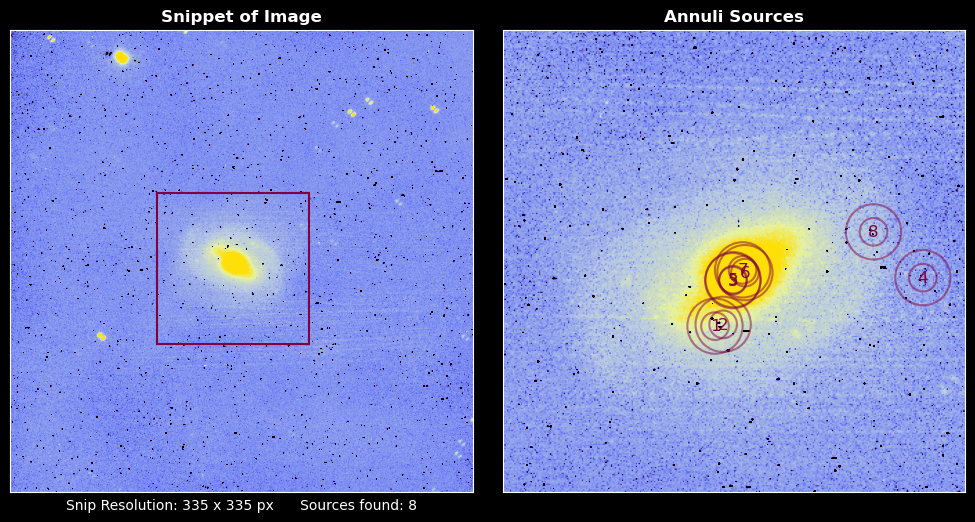

In [22]:
# initialize the PhotAnnulus class for M58
m58 = phan(m_sfr)
m_norm = m58.normalizer() # defaults: interval='ZScale', stretch='Sqrt', pmin=1, pmax=99.75
m_snippet, m_sources = m58.sources(xdim=(325, 660), ydim=(360, 695), sigma=4, threshold=6) # defaults: fwhm=4, threshold=5, r_in=10, r_out=20

m58.view_sources(m_sources, m_norm, figsize=(10, 5), cmap=ccm) # defaults: figsize=(16, 9), cmap='magma', mcolor='xkcd:wine', interpolation='hermite', nightmode=True
m_mags, m_srctable = m58.magnitudes([7]) # defaults: sigma=3.0, maxiters=10

In [20]:
print(f'[Magnitudes of Interacting Pair] \nNGC 4567: {ngc_mags[0][1]:.2f} \nNGC 4568: {ngc_mags[1][1]:.2f} \n')
print(f'[Magnitude of Non-Interacting Galaxy] \nM58: {m_mags[0][1]:.2f}')

[Magnitudes of Interacting Pair] 
NGC 4567: -14.20 
NGC 4568: -12.41 

[Magnitude of Non-Interacting Galaxy] 
M58: -6.39
